In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scikitplot as skplt

ImportError: No module named cross_validation

### TASK

A telecommunications company is concerned about the number of customers leaving them for other competitors. They need to understand who is leaving. 

## About dataset

We will use a telecommunications data for predicting customer churn. This is a historical customer data where each row represents one customer. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The data set includes information about:

**Customers who left within the last month** – the column is called Churn

**Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

**Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

**Demographic info about customers** – gender, age range, and if they have partners and dependents


###### Load Data From CSV File

In [2]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head(7)

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   
5    68.0  52.0     17.0   120.0  1.0    24.0    0.0       1.0       0.0   
6    42.0  40.0      7.0    37.0  2.0     8.0    1.0       1.0       1.0   

   longmon  ...  pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     4.40  ...    1.0       0.0       1.0     1.0    0.0    1.482    3.033   
1     9.45  ...    0.0       0.0       0.0     0.0    0.0    2.246    3.240   
2     6.30  ...    0.0       0.0       0.0     1.0    0.0    1.841    3.240   
3     6.05  ...    1.0       1.0       1.0     1.0    1.0    1.800    3.807   
4     7.10  ...    0.0       0.0       1.0     1.0    0.0    1.960    3.091   
5    20.70  ...    0.0       0.0       0.0     0.0    0.0    3.030    3.240   
6     8.25  ...    0.0       1.0       1.0     1.0    1.0    2.110    3.157   

   lninc  custcat  churn  
0  4.913      4.0    1.0  
1  3.497      1.0    1.0  
2  3.401      3.0    0.0  
3  4.331      4.0    0.0  
4  4.382      3.0    0.0  
5  4.787      1.0    0.0  
6  3.611      4.0    0.0  

[7 rows x 28 columns]

### Data pre-processing and selection

Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement by the skitlearn algorithm: And I will be using sklearn library

In [86]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','callcard', 'wireless','churn']]

churn_df['churn'] = churn_df['churn'].astype('int')

churn_df.head(7)

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   
5    68.0  52.0     17.0   120.0  1.0    24.0    0.0       1.0       0.0   
6    42.0  40.0      7.0    37.0  2.0     8.0    1.0       1.0       1.0   

   churn  
0      1  
1      1  
2      0  
3      0  
4      0  
5      0  
6      0

#### Lets define X, and y for our dataset:

In [87]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]



array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [88]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

### Now normalizing the dataset

In [89]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:3]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86]])

### Train/Test dataset

In [90]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


### Modeling (Logistic Regression with Scikit-learn)

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. **C parameter indicates inverse of regularization strength which must be a positive float**. Smaller values specify stronger regularization. Now lets fit our model with train set:

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
clf_Lo_Reg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
clf_Lo_Reg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predict using the testset

In [92]:
pred = clf_Lo_Reg.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

##### predict_proba 
returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [93]:
pred_prob = clf_Lo_Reg.predict_proba(X_test)
pred_prob

array([[0.54, 0.46],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.61, 0.39],
       [0.41, 0.59],
       [0.63, 0.37],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.48, 0.52],
       [0.43, 0.57],
       [0.66, 0.34],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.62, 0.38],
       [0.53, 0.47],
       [0.64, 0.36],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.71, 0.29],
       [0.68, 0.32],
       [0.51, 0.49],
       [0.42, 0.58],
       [0.71, 0.29],
       [0.6 , 0.4 ],
       [0.64, 0.36],
       [0.4 , 0.6 ],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.51, 0.49]])

### Evaluation

***jaccard index***

Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [94]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, pred)

0.75

### Buliding a confusion matrix

Another way of looking at accuracy of classifier is to look at **confusion matrix**.

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, pred, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


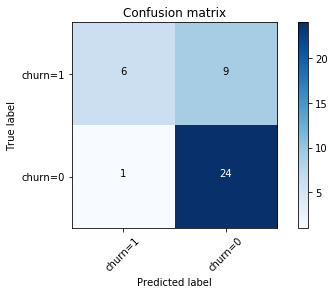

In [96]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

The first row is for customers whose actual churn value in test set is 1. As we can calculate, out of 40 customers, the churn value of 15 of them is 1. And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0.

It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row. It looks like there were 25 customers whom their churn value were 0.

The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes. In specific case of binary classifier, such as this example, we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.

In [97]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.73      0.96      0.83        25
          1       0.86      0.40      0.55        15

avg / total       0.78      0.75      0.72        40



### Simpler method of making confusion matrix

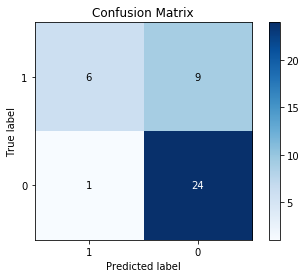

In [98]:
skplt.metrics.plot_confusion_matrix(y_test, pred ,labels=[1,0])

### log loss

Now, lets try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [99]:
from sklearn.metrics import log_loss
log_loss(y_test, pred_prob) 

0.6017092478101186

#### 1) Fitting using Gradient descent

We should find the best parameters for our model by minimizing the cost function of our model. 

To minimize the cost function we use below -- **Using an optimization approach. There are different optimization approaches, but we use one of famous and effective approaches here, gradient descent.**

**Generally, gradient descent is an iterative approach to finding the minimum of a function. Specifically, in our case, gradient descent is a technique to use derivative of a cost function to change the parameter values, to minimize the cost/error.**

Sigmoid function’s output is always between 0 and 1, which make it proper to interpret the results as probabilities. It is obvious that, when the outcome of sigma function get closer to 1, the probability of y=1, given x, goes up, and in contrast, when the sigmoid value is closer to zero, the probability of y=1, given x, is very small. Here we define a function to compute the sigmoid of an input.


In [100]:
#Compute the sigmoid function
def sigmoid(z):
    s =  1.0 / (1.0 + np.exp(- z))
    return s

We have to compare the output of our model with the actual label of the customer. Then, record the difference as our model’s error for each customer. The total error (for all customers) is cost of your model, and is calculated by model’s cost function. The cost function, by the way, basically represents how to calculate the error of the model, which is the difference between actual and the model’s predicted values. However, Logistic regression, uses a specific cost function which penalizes situations in which the class is 0 and the model output is 1, and vice versa. It uses log-likelihood to form the cost function.

In [101]:
# computes cost given predicted and actual values
def cost_computation(theta, X, y):
    hx = sigmoid(np.dot(X, theta)) # predicted probability of label 1
    cost = (-y)* np.log(hx) - (1-y)*np.log(1-hx) # log-likelihood vector
    J = cost.mean()
    return J

**Follow the curve by calculating the gradients or the first derivatives of the cost function with respect to each theta**

In [102]:
def grad_computation(theta, X, y):
    hx = sigmoid(np.dot(X, theta))
    error = hx - y # difference between label and prediction
    grad = np.dot(error, X) / y.size # gradient vector
    return grad

**This function predicts whether the label is 0 or 1 using learned logistic regression parameters**

In [103]:
def predict_class(theta, X):
    m, n = X.shape
    p = np.zeros(shape=(m, 1))

    h = sigmoid(X.dot(theta.T))

    for it in range(0, h.shape[0]):
        if h[it] > 0.5:
            p[it, 0] = 1
        else:
            p[it, 0] = 0

    return p.reshape(m,)

In [104]:
def gradient_descent(x, y, theta, alpha, iterations):
#gradient descent algorithm to find optimal theta values
    theta_n = theta.size  
    for i in range(iterations):
        h = sigmoid(np.dot(x, theta))
        gradient_val = grad_computation(theta, x, y)
        theta= theta - alpha * gradient_val
        print('>iteration=%d, lrate=%.3f, cost=%.3f' % (i, alpha, cost_computation(theta, x, y)))
    return theta

**we add 1 to as first value of each parameter vector, to play intrecept of the model**

In [105]:
X_train_1 = np.append( np.ones((X_train.shape[0], 1)), X_train, axis=1)
X_test_1 = np.append( np.ones((X_test.shape[0], 1)), X_test, axis=1)
X_train_1[0:5]

array([[ 1.  ,  1.09,  0.14, -0.75,  0.2 , -0.64,  1.32, -0.86],
       [ 1.  ,  0.86,  0.06, -1.15, -0.16,  0.92, -0.92,  1.16],
       [ 1.  ,  0.95,  0.91,  1.12,  0.19,  1.7 ,  0.42,  1.16],
       [ 1.  ,  1.55,  0.06,  1.12, -0.44,  0.14, -1.14,  1.16],
       [ 1.  ,  1.41,  0.68, -0.95,  2.01,  1.7 ,  1.54, -0.86]])

In [106]:
# prefix an extra column of ones to the feature matrix (for intercept term)
theta_0 = 0.1* np.random.randn(X_train_1.shape[1])
theta = gradient_descent(X_train_1, y_train, theta_0, 0.1, 100)

>iteration=0, lrate=0.100, cost=0.800
>iteration=1, lrate=0.100, cost=0.770
>iteration=2, lrate=0.100, cost=0.745
>iteration=3, lrate=0.100, cost=0.721
>iteration=4, lrate=0.100, cost=0.701
>iteration=5, lrate=0.100, cost=0.683
>iteration=6, lrate=0.100, cost=0.666
>iteration=7, lrate=0.100, cost=0.652
>iteration=8, lrate=0.100, cost=0.639
>iteration=9, lrate=0.100, cost=0.627
>iteration=10, lrate=0.100, cost=0.617
>iteration=11, lrate=0.100, cost=0.607
>iteration=12, lrate=0.100, cost=0.599
>iteration=13, lrate=0.100, cost=0.591
>iteration=14, lrate=0.100, cost=0.583
>iteration=15, lrate=0.100, cost=0.577
>iteration=16, lrate=0.100, cost=0.571
>iteration=17, lrate=0.100, cost=0.565
>iteration=18, lrate=0.100, cost=0.560
>iteration=19, lrate=0.100, cost=0.555
>iteration=20, lrate=0.100, cost=0.551
>iteration=21, lrate=0.100, cost=0.546
>iteration=22, lrate=0.100, cost=0.542
>iteration=23, lrate=0.100, cost=0.539
>iteration=24, lrate=0.100, cost=0.535
>iteration=25, lrate=0.100, cost=0.

In [107]:
pred = predict_class(np.array(theta), X_train_1)
#Compute accuracy on our training set
print ('Train Accuracy: %f' % ((y_train[(pred == y_train)].size / float(y_train.size)) * 100.0))

Train Accuracy: 78.125000


In [108]:
pred = predict_class(np.array(theta), X_test_1)
#Compute accuracy on our training set
print ('Test Accuracy: %f' % ((y_test[(pred == y_test)].size / float(y_test.size)) * 100.0))

Test Accuracy: 72.500000


### 2) Fitting using bfgs algorithm

Also, we can use **fmin_bfgs** to minimize the cost function. **fmin_bfgs** is a scipy built-in function which finds the best parameters theta for the logistic regression cost function given a fixed dataset.

In [109]:
theta = opt.fmin_bfgs(cost_computation, theta_0, fprime=grad_computation, args=(X_train_1, y_train))

Optimization terminated successfully.
         Current function value: 0.437695
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28


### 3) Fitting using Stochastic Gradient Descent

What if we estimate gradient with just one sample?

Gradient Descent is the process of minimizing our cost function by following the gradients of the cost function.

'Stochastic Gradient Descent' is an optimization algorithem where we update the coefficients of the model in every iteration to minimize the error of a model on the training data. The way this algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction.

**Stochastic Gradient Descent**


In this function we calculate the error for each prediction and update the theta accordingly. The error is calculated as the difference between the predication value and the actual label.

In [110]:
# Calculate h_theta -- Predictionof a row
def predict_row(row, theta):
    hx = sigmoid(np.dot(row, theta))
    return hx

In [111]:
# Estimate theta using stochastic gradient descent
def theta_sgd(X_train, y_train, alpha, n_epoch):
    theta = [0.0 for i in range(len(X_train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for x,y in zip(X_train_1,y_train):
            ht = predict_row(x, theta)
            error =  ht - y
            theta[0] = theta[0] - alpha * error 
            for i in range(len(theta)-1):
                theta[i + 1] = theta[i + 1] - alpha * error  * x[i+1]
        sum_error += error**2
        # cost computation
        cost = cost_computation(theta, X_train, y_train)
        print('>epoch=%d, lrate=%.3f, error=%.3f, cost=%.3f' % (epoch, alpha, sum_error,cost))
    return theta

In [112]:
theta = theta_sgd(X_train_1,y_train, 0.001, 100)

>epoch=0, lrate=0.001, error=0.263, cost=0.669
>epoch=1, lrate=0.001, error=0.274, cost=0.649
>epoch=2, lrate=0.001, error=0.283, cost=0.632
>epoch=3, lrate=0.001, error=0.292, cost=0.617
>epoch=4, lrate=0.001, error=0.299, cost=0.604
>epoch=5, lrate=0.001, error=0.305, cost=0.593
>epoch=6, lrate=0.001, error=0.310, cost=0.583
>epoch=7, lrate=0.001, error=0.314, cost=0.574
>epoch=8, lrate=0.001, error=0.318, cost=0.566
>epoch=9, lrate=0.001, error=0.321, cost=0.558
>epoch=10, lrate=0.001, error=0.324, cost=0.552
>epoch=11, lrate=0.001, error=0.326, cost=0.546
>epoch=12, lrate=0.001, error=0.328, cost=0.540
>epoch=13, lrate=0.001, error=0.329, cost=0.535
>epoch=14, lrate=0.001, error=0.331, cost=0.530
>epoch=15, lrate=0.001, error=0.332, cost=0.526
>epoch=16, lrate=0.001, error=0.332, cost=0.522
>epoch=17, lrate=0.001, error=0.333, cost=0.518
>epoch=18, lrate=0.001, error=0.333, cost=0.514
>epoch=19, lrate=0.001, error=0.333, cost=0.511
>epoch=20, lrate=0.001, error=0.333, cost=0.508
>e

In [113]:
pred = predict_class(np.array(theta), X_train_1)
#Compute accuracy on our training set
print ('Train Accuracy: %f' % ((y_train[(pred == y_train)].size / float(y_train.size)) * 100.0))

Train Accuracy: 77.500000


In [114]:
pred = predict_class(np.array(theta), X_test_1)
#Compute accuracy on our training set
print ('Test Accuracy: %f' % ((y_test[(pred == y_test)].size / float(y_test.size)) * 100.0))

Test Accuracy: 72.500000


### Regularization

There is a parameter, regularization, that is used for preventing over fitting. We can find the best regularization value using accuracy:

In [115]:
Regularization_Inv=[0.00001,0.1,1,100]
Length=len(Regularization_Inv)
mean_acc=np.zeros((Length))
std_acc=np.zeros((Length))
ConfustionMx=[];


for Reg,n in zip(Regularization_Inv,range(0,Length)):
    
    LR = LogisticRegression(C=Reg).fit(X_train,y_train)
    yhat=LR.predict(X_test)
    mean_acc[n]=np.mean(yhat==y_test);
    
    
    std_acc[n]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    ConfustionMx.append(confusion_matrix(yhat,y_test,labels=[1,0]))
mean_acc

array([0.72, 0.72, 0.72, 0.72])

In [116]:
print( "The best accuracy for Logistic regression is", mean_acc.max())

The best accuracy for Logistic regression is 0.725
